# KNN Classisfication - Heart Disease

## Introduction
___

**Heart diseases**, which are often caused by the narrowing of blood vessels, are the most common cause of death globally (CDC 2022). Recognizing the primary risk factors for heart disease is crucial for reducing mortality risks due to a heart disease. A research conducted by Hajar in 2017 highlights several key risk factors, including hypertension (high blood pressure), hypercholesterolemia (high cholesterol levels), and lack of physical activity. Therefore, this analysis aims to explore this question: **Can we predict a heart disease diagnosis based on age, serum cholesterol, resting blood pressure, maximum heart rate, and exercised-induced ST Depression, using KNN Classification?**

The *Heart Disease* dataset (1988) cotains patients' personal and health information such as age and cholesterol, incuding the metioned predictors in the above question. The dataset incudes the patients' heart disease diagnoses, which is categorical as 0 (indicating absence of heart disease) and 1 (indicating presence of heart disease). Here, the diagnosis for heart disease indicates >50% narrowing in any major blood vessel. The data includes some information which we do not need such as sex and thal, and it is provided from four different location in four different files. So it must be tidyed and combined before it is analyzed.
ust be combined before it is analyzed.

## Methods
____

### 1. Loading and Cleaning Data

Let's start by installing these libraries. `tidyverse` has functions which will help us to load and clean up our data, while `tidymodels` contains the tools we need to build and test our KNN model. 

In [61]:
# Install these libraries before continuing
library(tidyverse)
library(tidymodels)

As we work with the data, we will show many dataframes. We should ensure that only a small number like 6 rows show every time, so that the dataframes are not too overwhelming to look at.

In [62]:
options(repr.matrix.max.rows = 6)

As mentioned, this data is actually the combination of four datasets from four locations. This includes data from:

- Cleveland (USA)
- Hungary
- Switzerland
- Long Beach (USA)

Each dataset has a separate `.csv` file. We need to load in all four of these files from the web using `read_csv()` from the `tidyverse` library.

The `.csv` files do not include the names of the correct columns, so we must add the names in manually.

In [63]:
# Reading data from web (stored in github repo)
cleveland_url <- "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.cleveland.csv"
hungarian_url <- "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.hungarian.csv"
switzerland_url <- "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.switzerland.csv"
beach_url <-  "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.va.csv"

names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thanl", "num")

cleveland <- read_csv(cleveland_url, col_names = names)
hungarian <- read_csv(hungarian_url, col_names = names)
switzerland <- read_csv(switzerland_url, col_names = names)
beach <- read_csv(beach_url, col_names = names)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thanl
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thanl
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thanl
dbl (5): age, sex, cp, chol, num

ℹ Use `spec()` to r

Let's take a look at one of the dataframes.

In [67]:
hungarian

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thanl,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1
58,0,2,180,393,0,0,110,1,1,2,NA,7,1
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1


The data includes information of patients, such as `age` (age in years). We will discuss each column as necessary. The `num` column, which will soon be described in more detail, contains the heart disease diagnosis. This means `num` is important, since it is what we want to predict.

This data is actually already 'tidy', which is to say:

- Each row is an observation of a single patient's information
- Each column is a single variable, which is some type of medical information
- Each cell is a single measurement.

To train a single KNN model, we should combine all four dataframes into one single dataframe. Using `bind_rows`, will keep the column names the same and join the dataframes vertically together. The issue is that each dataset has different types for each column. For example, `chol` is a double in Cleveland's data, but a character in the Hungarian data. Due to the variation between column types in the four datasets, it is simplest to change all columns of the datasets to doubles.

In [71]:
# Changing all columns to doubles to be able to combine the 4 dataframes
cleveland <- mutate_all(cleveland, as.double)
hungarian <- mutate_all(hungarian, as.double)
switzerland <- mutate_all(switzerland, as.double)
beach <- mutate_all(beach, as.double)

# Bind rows
heart_data_combined <- bind_rows(cleveland, hungarian, switzerland, beach)
heart_data_combined

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thanl,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1


(The warnings produced by the previous code are due to that fact that `?` values for missing data have been replaced with NA values.)

Now we have one dataframe with data from **920** patients (as can be seen from the size of the tibble, 920 x 14).

Now we can a closer look at the `num` column, which as previously mentioned, is what we want to predict.

In [72]:
num_summary <- heart_data_combined |>
    group_by(num) |>
    summarize(count = n())

num_summary

num,count
<dbl>,<int>
0,411
1,265
2,109
3,107
4,28


So, `num` includes values from **0** to **4**. From the database description, we know that 0 indicates the absence of heart disease. Values 1-4 suggest the presence of heart disease in increasing severity (1 being the least severe, 4 being the most severe).



Our goal is only to classify the absence (0) or presence (1) of heart disease, and we do not need to introduce further complexity. Also, Hungarian data does not use the 1-4 scale and only uses the absence (0) and presence (1) classification. So, this conversino will also make the scales consistent.



We will simplify this by making all values from 1-4 into 1. In summary, `num` will be as follows:

- **`num = 0`** indicates the absence of patient disease (<50% narrowing of blood vessel diameter)
- **`num = 1`** indicates the presence of patient disease (>50% narrowing of blood vessel diameter)

We also need to change from its numerical type, double, it into a factor type. This reflects the fact that it is categorical, and must be done before training the model.

In [73]:
heart_adjusted <- heart_data_combined |>
    mutate(num = ifelse(num %in% 1:4, 1, num)) |> # Change num values 1-4 to one
    mutate(num = as_factor(num)) # Convert to factor

heart_adjusted

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thanl,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,1
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1


Let's do some final cleaning of the data.

Look at the potential predictors that we have available (all columns except `num`). We have both continous predictors like age, and categorical predictors like 'cp', which is the type of chest pain. Categorical variables can be used as predictors, but they require preprocessing, which is outside of the scope of this report.

There is an advantage of narrowing the number of possible predictors *before* splitting the data into training and testing. We are going to remove observations with missing information (NAs) from the data. Reducing the number of possible predictors beforehand can reduce the amount of lost information. For example, `thanl` might have lots of NAs, but if know we won't use `thanl`, then we don't need to remove all of those observations.

So, let's select only our possible continuous predictors, and then filter out all of our NA values.



So, we will narrow our possible predictors down to the continuous variables, which will include:

- **age**: patient age (years)
- **chol**: serum cholesterol (mg/dl)
- **trestbps**: resting blood pressure (mmHg)
- **thalach**: maximum heart rate achieved during exercise (bps)
- **oldpeak**: ST depressing induced relative to exercise (this is a ratio)

*(**Note**: We are only narrowing down our possible predictors, and we are *not* choosing these as our final predictors).

`num` was collected for all patients and does not need to be filtered for NA. There is also an incorrect value where `chol` is 0, which is not possible for serum cholesterol.

In [87]:
clean_heart <- heart_adjusted |>
    select(age, chol, trestbps, thalach, oldpeak, num) |>
    filter(!is.na(age), !is.na(chol), !is.na(trestbps), !is.na(thalach), !is.na(oldpeak)) |> # Remove NAs
    filter(chol != 0)

clean_heart

age,chol,trestbps,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,233,145,150,2.3,0
67,286,160,108,1.5,1
67,229,120,129,2.6,1
⋮,⋮,⋮,⋮,⋮,⋮
54,333,127,154,0,1
55,223,122,100,0,1
62,254,120,93,0,1


Now, the number of patients we have information for has reduced from 920 to 672. This is a reduction in the amount of data, but is still usable.

Now we will split our data into:

- **training Data**, which will be used to train our KNN model.
- **testing Model** which will be used to test the accuracy of our KNN model.

We will split the data into 75% training and 25% testing. The splitting of data is a random process to ensure that data is not chosen in a biased way. Setting the seed will allow this random process to be reproduced.

In [88]:
# Split data into training (75%) and testing (25%) data
set.seed(1234)                    

heart_split <- initial_split(clean_heart, prop = 0.75, strata = num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

arrange(heart_train, age)
arrange(heart_test, age)

age,chol,trestbps,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,132,130,185,0,0
29,204,130,202,0,0
29,243,120,160,0,0
⋮,⋮,⋮,⋮,⋮,⋮
76,197,140,116,1.1,0
77,304,125,162,0.0,1
77,171,124,110,2.0,1


age,chol,trestbps,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
30,237,170,170,0,0
31,219,100,150,0,0
32,225,110,184,0,0
⋮,⋮,⋮,⋮,⋮,⋮
68,193,144,141,3.4,1
69,216,122,84,0.0,1
70,192,170,129,3.0,1


### 2. Preliminary Analysis

#### 2a. Data summaries

Now we have our clean data that we will use in our analysis, let's explore the training data a bit more.

In [103]:
heart_predictors <- heart_train |>
    select(age, chol, trestbps, thalach, oldpeak)
        
heart_means <- heart_predictors |>
    map_df(mean)

heart_max <- heart_predictors |>
    map_df(max)

heart_min <- heart_predictors |>
    map_df(min)

summaries <- bind_rows(heart_means, heart_max, heart_min)

summary_table <- tibble(summary = c("mean", "max", "min")) |>
    bind_cols(summaries)

summary_table

summary,age,chol,trestbps,thalach,oldpeak
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mean,52.82107,248.1113,132.9304,140.5964,0.9151093
max,77.00000,603.0000,200.0000,202.0000,6.2000000
min,28.00000,85.0000,92.0000,69.0000,0.0000000


These values can tell us more about how we will be able to use our model. For example, since `age` only ranges between 28 and 77, then our final model might not be so effective on people under 28 or over 77. 

Also, let's look at the distribution of our predicted variable, `num`.

In [104]:
heart_obs <- heart_train |>
    group_by(num) |>
    summarize(count = n())

heart_obs

num,count
<fct>,<int>
0,265
1,238


This tells us the number of 0 and 1 diagnoses present in the dataset are relatively even. This is good, because models perform optimally when the number of classes are balanced. For example, if there were significantly more values where `num` was 0 than when `num` was one, the model would be more biased towards predicting that `num` is 0.

#### 2b. Graphs (and Selecting Predictors)

We will generate two side-by-side **histograms** for each predictor, separated by `num`. This is a way of further understanding how our possible predictors are distributed.

However, it is also a rudimentary but useful way of determining whether a predictor might be useful. Essentially, if the presence or absence of heart disease seems to change with the distribution of a predictor, that might mean that the predictor is useful (as we will see). We will also will supplement the analysis with general information about the relevance of each predictor.

In [105]:
# Plots visualizing distribution of each variable, separated by diagnosis of heart disease
options(repr.plot.width = 8) # Alter to fit screen

# Renaming num for plots only to make the legend clearer
heart_train_renamed_num <- heart_train |>
                            mutate(diagnosis = case_when(
                                num == 0 ~ "No Heart Disease(<50% diameter narrowing)",
                                num == 1 ~ "Heart Disease (>50% diameter narrowing)"
                            ))

y_lab = "Number of People"
leg_lab = "Heart Disease Diagonis"
text_size = 15

plot_age <- ggplot(heart_train_renamed_num, aes(x = age)) +
    geom_histogram(aes(fill = diagnosis)) +
    labs(x = "Age (Years)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    ggtitle("Distribution of Age (Predictor) Separated by Heart Disease Diagnosis") +
    theme(text = element_text(size = text_size))

plot_chol <- ggplot(heart_train_renamed_num, aes(x = chol)) +
    geom_histogram(aes(fill = diagnosis)) +
    labs(x = "Serum Cholesterol (mg/dl)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    ggtitle("Distribution of Cholesterol Levels (Predictor) Separated by Heart Disease Diagnosis") +
    theme(text = element_text(size = text_size))

plot_trestbps <- ggplot(heart_train_renamed_num, aes(x = trestbps)) +
    geom_histogram(aes(fill = diagnosis)) +
    labs(x = "Resting Blood Pressure (mmHg)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    ggtitle("Distribution of Resting Blood Pressure (Predictor) Separated by Heart Disease Diagnosis") +
    theme(text = element_text(size = text_size))

plot_thalach <- ggplot(heart_train_renamed_num, aes(x = thalach)) +
    geom_histogram(aes(fill = diagnosis)) +
    labs(x = "Maximum Heart Rate (bpm)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    ggtitle("Distribution of Maximum Heart Rate (Predictor) Separated by Heart Disease Diagnosis") +
    theme(text = element_text(size = text_size))

plot_oldpeak <- ggplot(heart_train_renamed_num, aes(x = oldpeak)) +
    geom_histogram(aes(fill = diagnosis)) +
    labs(x = "ST Depression Induced by Exercise Relative to Rest (Ratio)", y = y_lab, fill = leg_lab) +
    facet_grid(cols = vars(num)) +
    theme(text = element_text(size = text_size)) +
    ggtitle("Distribution of ST Depression Induced by Exercise Relative to Rest (Predictor) Separated by Heart Disease Diagnosis") 

**Age**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


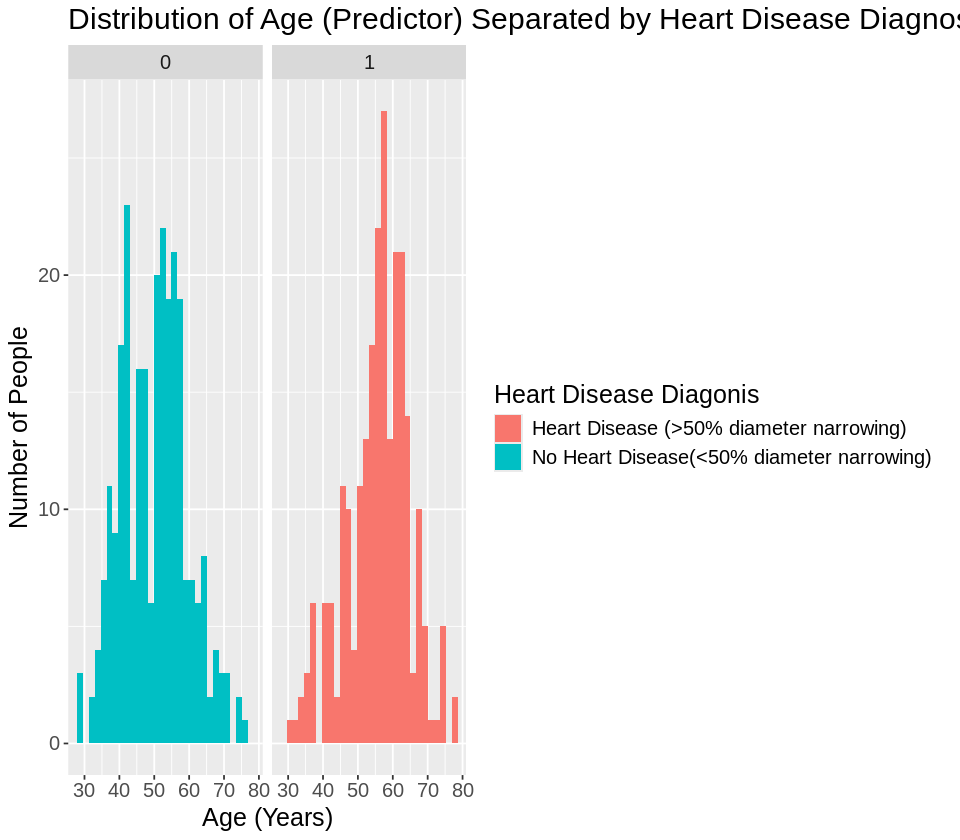

In [106]:
plot_age

- As age increases, the risk of cardiovascular diseases increases for both sexes (Jousilahti et. al 1999). This makes sense as health generally declines with older age.
- We can see this represented in the training data. We see that the distribution for `num = 0` is slightly skewed towards the left, or toward a younger age, where `num = 1` is skewed somewhat further towards the right.
- In the model, this might mean a higher age will make the model more likely the presence of heart disease, or num = 1. So, age is likely a useful predictor.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


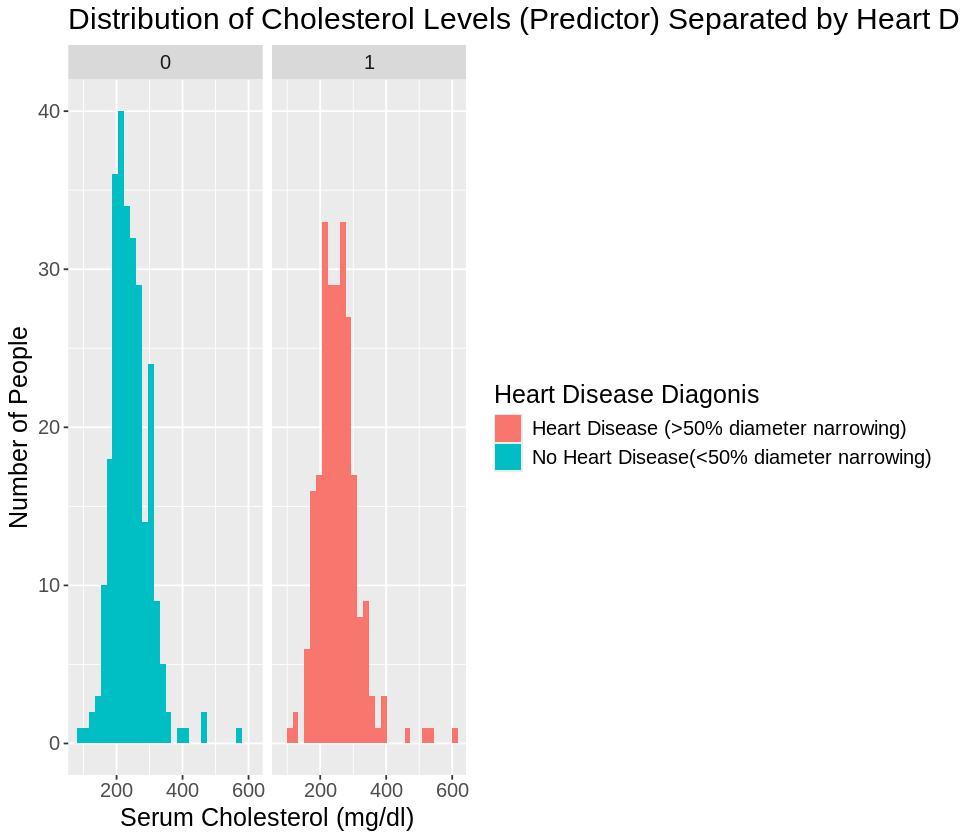

In [99]:
plot_chol

- High serum cholesterol is another well-known risk factor of heart disease (Hajar, 2017), as cholesterol directly affects cardiovascular health.
- We see that for those without heart disease (num = 0) it peaks at just under 200mg/dl. On the other hand, num=1 has a type of peak around 200-300. So, the trend of higher serum cholesterol being related with heart disease seems to be represented on the graph.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


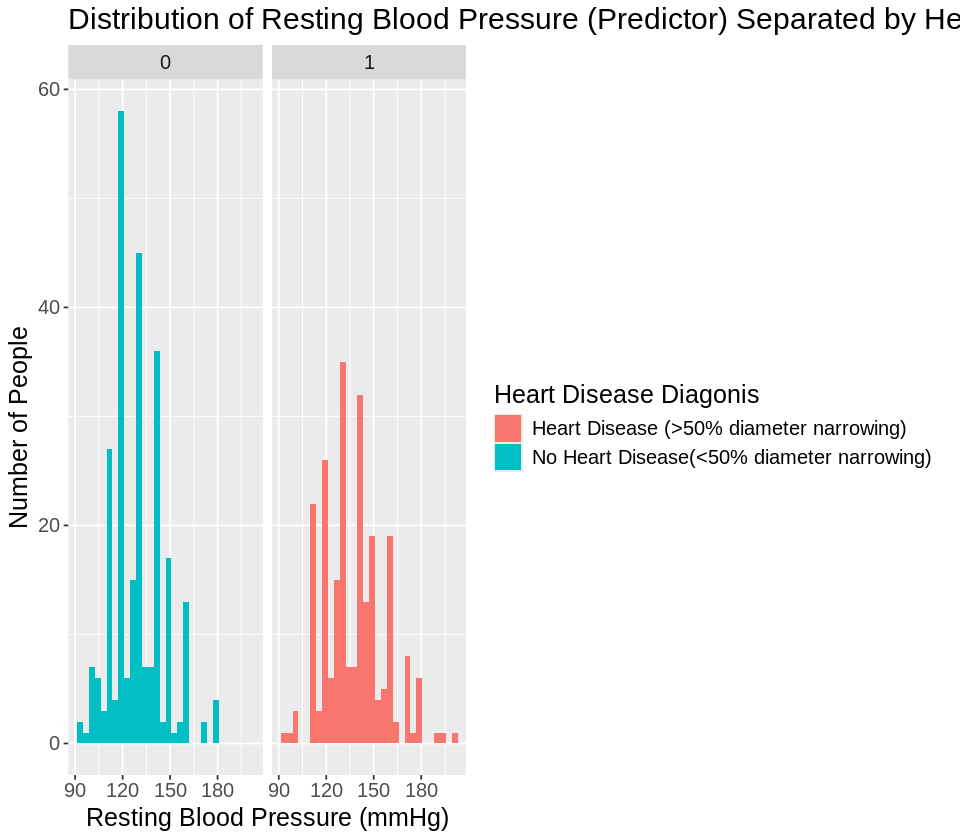

In [100]:
plot_trestbps

- High blood pressure also increases the risk of cardiovascular diseases (Hajar, 2017), and is related to changes in the health of blood vessels.
- It generally appears that when num=0, the distribution is skewed towards slightly lower values. The distribution of `trestbps` when `num = 1`, which has a comparatively more even distribution.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


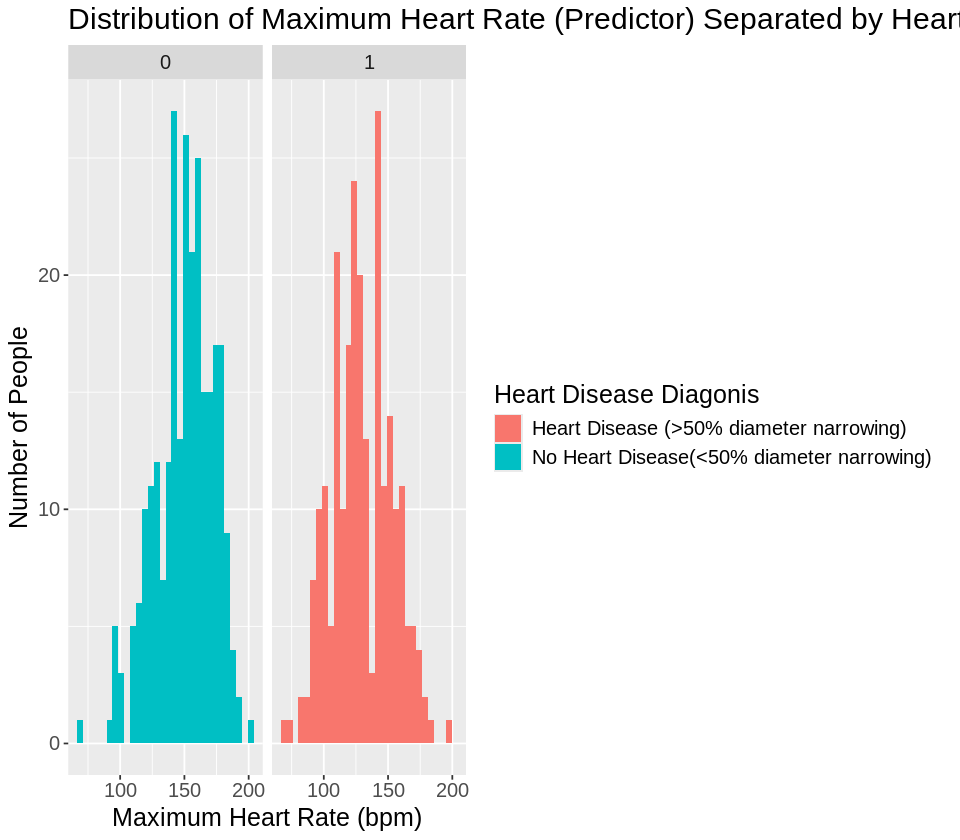

In [101]:
plot_thalach

- Maximal heart rate and the risk of cardiovascular disease are *inversely* correlated (Savonen et al., 2006), meaning that those with heart disease show a lower ability to raise heart rate during exercise.
-The distribution of `thalach` (maximal heart rate) may represent this. When num=0, the distribution has a rough peak aroun 150bpm. On the other hand, when num=1, the data seems to be slightly centered around a value under 150bpm.
- But the difference between these two distributions is not as stark as the predictor candidates we have previously seen, so it is possible that this is not as strong a predictor.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


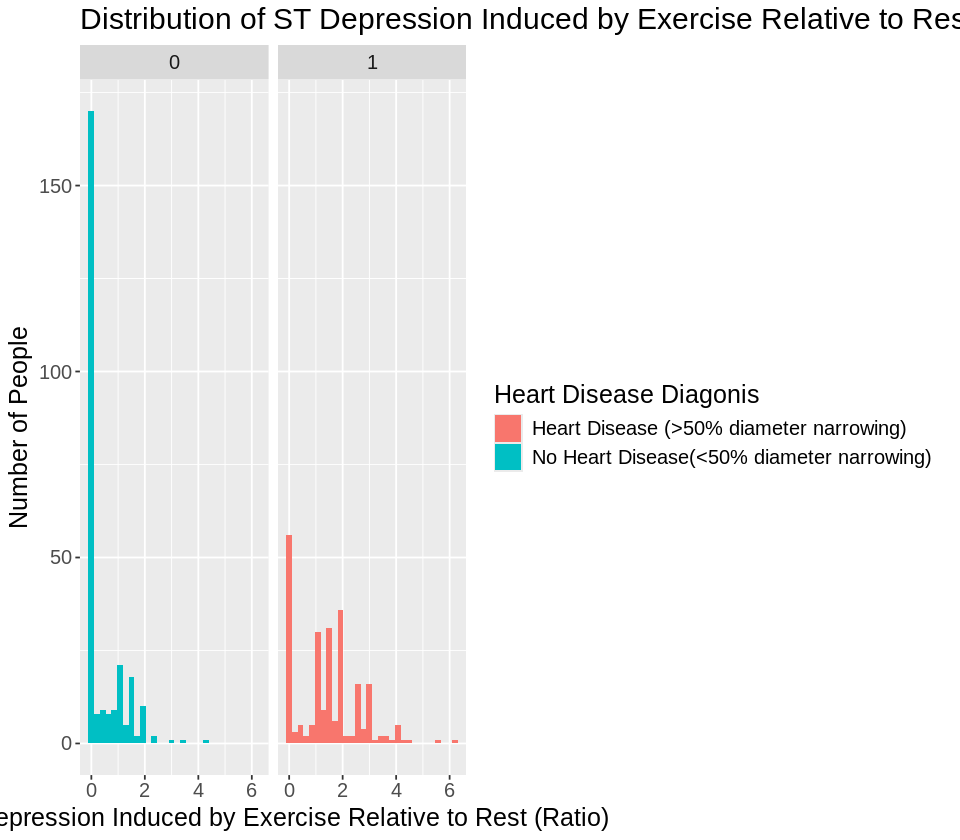

In [102]:
plot_oldpeak

- ST depression is a pattern that is sometimes observed on an ECG measurement. The frequency of ST depressions, both while the patient is exercising or resting, can be useful predictors of heart disease (Lanza et al., 2004).
- This measurement, `oldpeaks`, is the ratio of ST depression while exercising to ST depression while resting, so it incorporates both of these values.
- As seen on the graph above, when num=1 the oldpeaks values are overall much higher than when num=0. In fact, it appears that patients without heart disease (num=0) mostly have an oldpeaks value of 0, which indicates no ST depressions observed during exercise.
- So, generally speaking, this might indicate that our model will be more likely to predict patients with high oldpeaks values as having heart disease (num=1).

So, it looks like all of these predictors, including **age, chol, trestbps, thalach** and **oldpeaks** may be useful in our analysis.

### KNN Classification

In [22]:
# Recipe (standardization)
set.seed(1234)

heart_recipe <- recipe(num ~ ., data = heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Define model specification - tune neighbors using 5-fold cross validation
heart_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_vfold <- vfold_cv(heart_train, v = 5, strata = num)
vals <- tibble(neighbors = seq(from = 1, to = 20))

heart_accuracy <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_tune) |>
    tune_grid(resamples = heart_vfold, grid = vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy") |>
    arrange(neighbors)

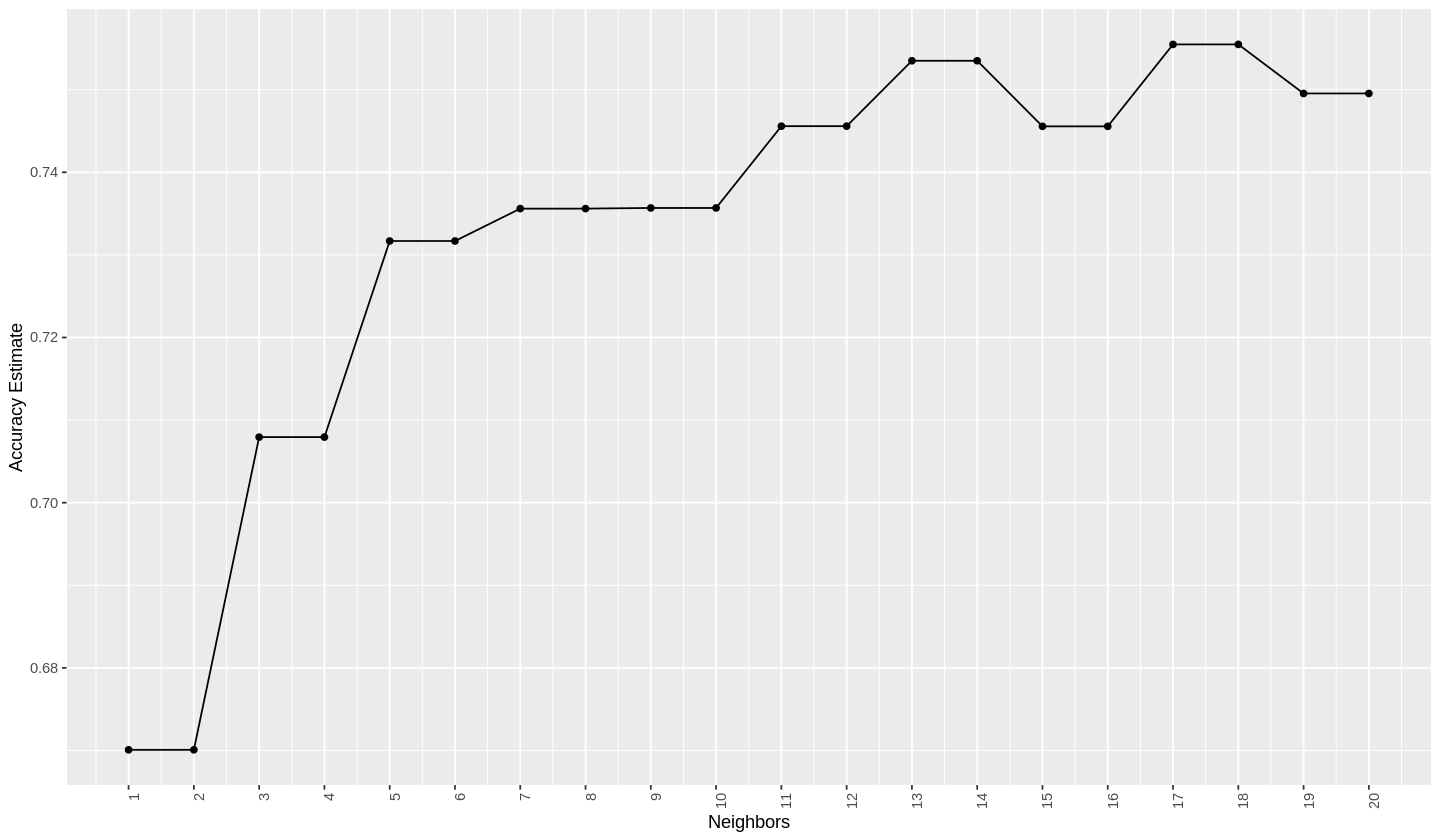

In [23]:
# Generate graph of accuracy
options(repr.plot.width = 12)
k_accuracies <- ggplot(heart_accuracy, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 100, by = 1)) +
       theme(axis.text.x = element_text(angle = 90, hjust = 1))

k_accuracies

In [24]:
# Determine best k

best_k <- heart_accuracy |>
    arrange(-mean) |>
    slice(1) |>
    select(neighbors) |>
    pull()

best_k

best_train_accuracy <- heart_accuracy |>
    summarize(accuracy = max(mean)) |>
    pull()

percent(best_train_accuracy)

[1] 17

[1] "76%"

In [25]:
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_resample_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_spec) |>
    fit(data = heart_train)

heart_resample_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(17L,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2564612
Best kernel: rectangular
Best k: 17

In [26]:
# Prediction on the testing data
heart_test_predict = predict(heart_resample_fit, heart_test)|>
    bind_cols(heart_test)

# heart_train_resample_predict
heart_test_accuracy <- metrics(data = heart_test_predict, truth = num, estimate = .pred_class) |>
    filter(.metric == "accuracy")|>
    pull()

heart_test_accuracy

[1] 0.6923077

In [27]:
# Confusion Matrix
confusion <- heart_test_predict |>
             conf_mat(truth = num, estimate = .pred_class)

confusion

          Truth
Prediction  0  1
         0 75 38
         1 14 42

In [28]:
tidy_conf_mat <- confusion |>
    tidy()

negative_correct <- tidy_conf_mat |>
    filter(name == "cell_1_1") |>
    pull()

# Predictions which should have been negative but were positive
negative_incorrect <- tidy_conf_mat |>
    filter(name == "cell_1_2") |>
    pull()

# Predictions which should have been positive but were negative
positive_incorrect <- tidy_conf_mat |>
    filter(name == "cell_2_1") |>
    pull()

positive_correct <- tidy_conf_mat |>
    filter(name == "cell_2_2") |>
    pull()

precision <- positive_correct / (positive_correct + negative_incorrect)
recall <- positive_correct / (positive_correct + positive_incorrect)

precision
recall

[1] 0.525

[1] 0.75

## Citations
Hajar, R. (2017). Risk factors for coronary artery disease: Historical perspectives. Heart Views, 18(3), 109–109. https://doi.org/10.4103/heartviews.heartviews_106_17


Janosi, A., Steinbrunn, W., Pfisterer, M., Detrano, R. Heart Disease UCI Machine Learning Repository [Data set]. https://doi.org/10.24432/C52P4X

Heart Disease and Stroke. (2022 8 September). CDC. https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=The%20Nation's%20Risk%20Factors%20and,unhealthy%20diet%2C%20and%20physical%20inactivity.

Jousilahti, P., Vartiainen, E., Tuomilehto, J., Puska, P. Sex, Age, Cardiovascular Risk Factors, and Coronary Heart Disease. (1999). Circulation, 99, 1165-1172. https://doi.org/10.1161/01.CIR.99.9.1165

Lanza, G. A., Mustilli, M., Sestito, A., Infusino, F., Sgueglia, G. A., Crea, F. (2004). Diagnostic and prognostic value of ST segment depression limited to the recovery phase of exercise stress test. *Heart, 90*(12), 1417-1421. https://doi.org/10.1136/hrt.2003.031260

Savonen, K., Lakka, T. A., Laukkanen, J. A., Halonen, P. M., Rauramaa, T. H., Salonen, J. T., Rauramaa, R. (2006). Heart rate response during exercise test and cardiovascular mortality in middle-aged men. *European Heart Journal, 27*(5), 582-588. https://doi.org/10.1093/eurheartj/ehi708

Citations and in-text citations excluded from word count